In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git
!cp "/content/Mask_RCNN/mrcnn" "/content/" -r
!rm "/content/Mask_RCNN" -r

In [ ]:
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [ ]:
!pip install tensorflow==1.15.0
!pip install keras==2.3.1
!pip install h5py==2.10.0

In [1]:
import matplotlib.pyplot as plt

In [2]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

Using TensorFlow backend.


In [3]:
import numpy as np

In [4]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [5]:
model.load_weights("dataset/mask_rcnn_coco.h5", by_name=True)

2022-04-15 19:29:27.116726: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-15 19:29:31.261098: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-15 19:29:31.261122: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kabilan-pt4987): /proc/driver/nvidia/version does not exist
2022-04-15 19:29:31.262118: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-15 19:29:31.267593: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2022-04-15 19:29:31.268282: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558b4c84f830 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-15

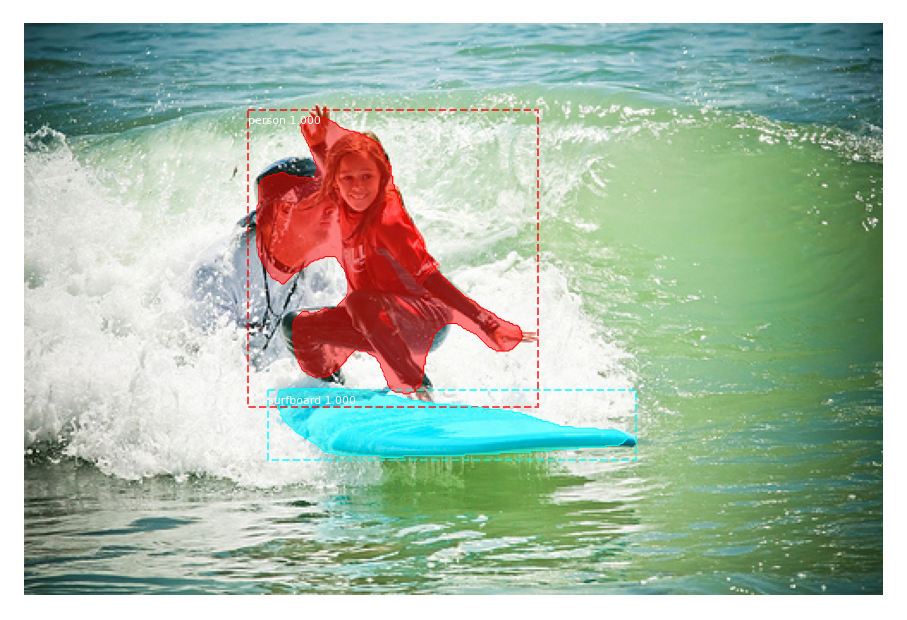

In [6]:
im_path= "dataset/images/2696060728_3043cfc38c.jpg"
image = cv2.imread(im_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r = model.detect([image], verbose=0)
r = r[0]
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'],)

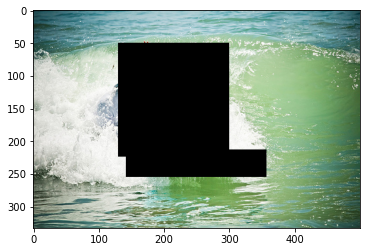

In [8]:
im = cv2.imread(im_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
for each in r['rois']:
  im = cv2.rectangle(im,(each[1],each[0]),(each[3],each[2]),(0,0,0),-1)
plt.imshow(im);

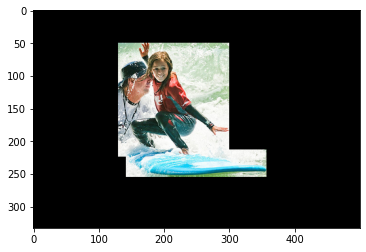

In [9]:
im = cv2.imread(im_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2], dtype="uint8")
for each in r['rois']:
  cv2.rectangle(mask,(each[1],each[0]),(each[3],each[2]),255,-1)
plt.imshow(mask)
masked = cv2.bitwise_and(im, im, mask=mask)
plt.imshow(masked);